# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)  shows that (cities) is simply a list of city names

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
#city_lat = [] 
#city_lng = []
#city_max_temp = []
#city_humidity = []
#city_clouds = []
#city_wind = []
#city_country = []
#city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url = f"{url}appid={weather_api_key}&units={units}&q="  #q= is how we add the cities
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la plata
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | hadibu
Processing Record 6 of Set 1 | mugumu
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | aswan
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kogalym
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | puerto santa
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | murun-kuren
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | ust'-barguzin
Processing Record 22 of Set 1 | edinburgh of the s

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la plata,-34.9215,-57.9545,16.68,76,17,2.56,AR,1691607735
1,talnakh,69.4865,88.3972,16.23,64,100,3.30,RU,1691607856
2,adamstown,-25.0660,-130.1015,19.07,73,19,9.76,PN,1691607856
3,lihue,21.9789,-159.3672,29.58,71,75,9.77,US,1691607857
4,hadibu,12.6500,54.0333,25.69,80,74,7.11,YE,1691607857


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la plata,-34.9215,-57.9545,16.68,76,17,2.56,AR,1691607735
1,talnakh,69.4865,88.3972,16.23,64,100,3.30,RU,1691607856
2,adamstown,-25.0660,-130.1015,19.07,73,19,9.76,PN,1691607856
3,lihue,21.9789,-159.3672,29.58,71,75,9.77,US,1691607857
4,hadibu,12.6500,54.0333,25.69,80,74,7.11,YE,1691607857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

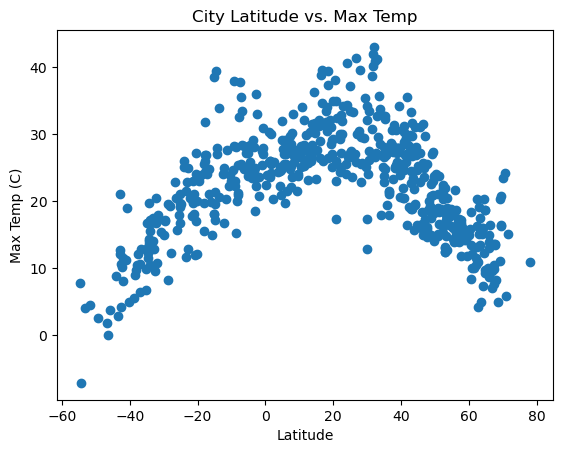

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('City Latitude vs. Max Temp')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

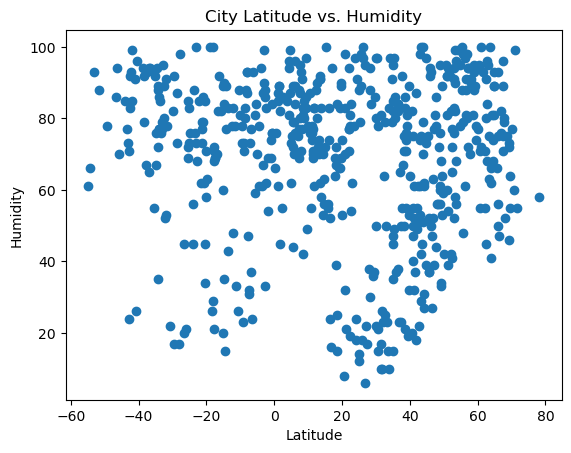

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

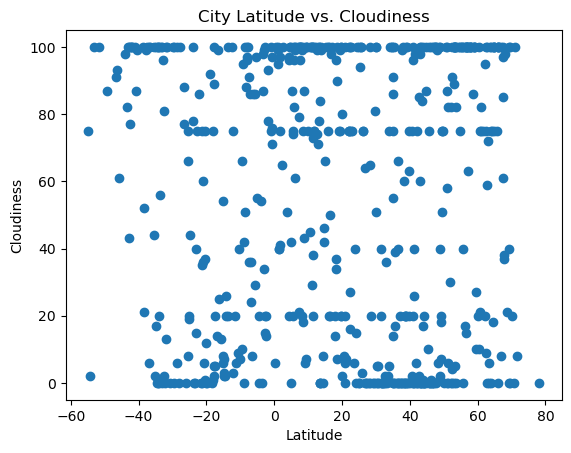

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

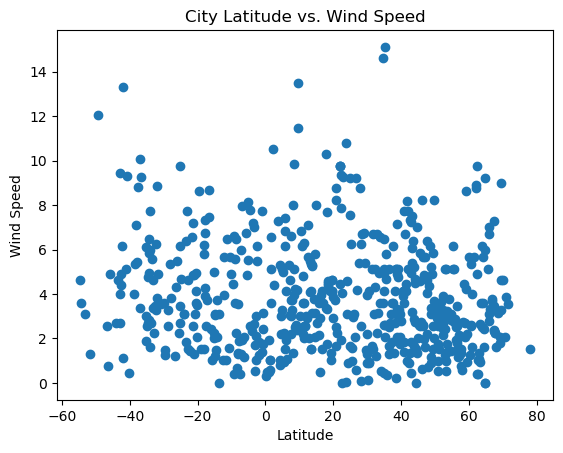

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()
#northern_hemi_df.count() shows the truncated data set

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,16.23,64,100,3.30,RU,1691607856
3,lihue,21.9789,-159.3672,29.58,71,75,9.77,US,1691607857
4,hadibu,12.6500,54.0333,25.69,80,74,7.11,YE,1691607857
7,aswan,24.0934,32.9070,40.61,18,0,3.09,EG,1691607857
10,kogalym,62.2654,74.4791,11.51,55,95,8.91,RU,1691607858


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la plata,-34.9215,-57.9545,16.68,76,17,2.56,AR,1691607735
2,adamstown,-25.0660,-130.1015,19.07,73,19,9.76,PN,1691607856
5,mugumu,-1.8500,34.7000,20.80,54,78,1.25,TZ,1691607857
6,papatowai,-46.5619,169.4708,1.83,86,91,2.54,NZ,1691607857
8,hermanus,-34.4187,19.2345,14.33,88,0,4.93,ZA,1691607857


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4410205919989242


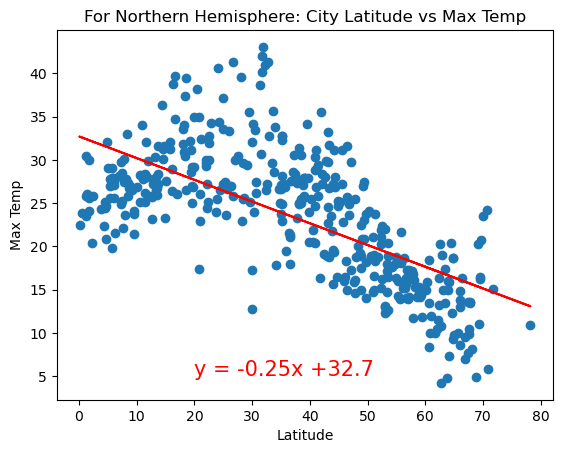

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']  #define new X and Y values
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('For Northern Hemisphere: City Latitude vs Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()

Discussion about Linear Relationship between Northern Hemisphere City Latitude and Max Temp:  
There is the general trend of decreasing Max Temp as one travels farther north from the equator.  However based on the R2 value, the equation from the linear regression is not very predictive since only about 44% of the relationship is described by this equation.

The r-value is: 0.650251482238336


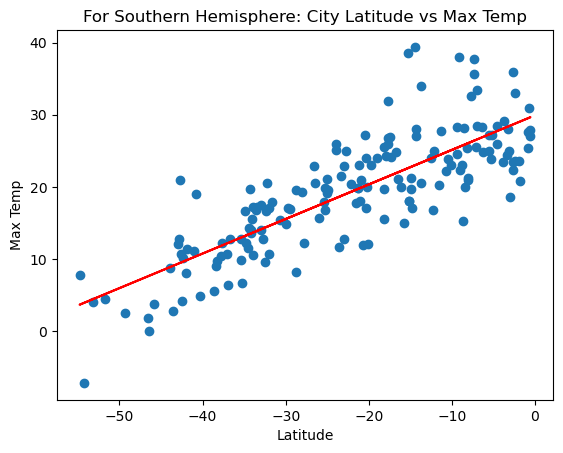

In [30]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']  #define new X and Y values
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('For Southern Hemisphere: City Latitude vs Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion about Linear Relationship between Southern Hemisphere City Latitude and Max Temp:  
There is the general trend of decreasing Max Temp as one travels farther south from the equator.  For the Southern hemispher, the equation from the linear regression is moderately predictive since about 65% of the relationship is described by this equation.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0006213735647602814


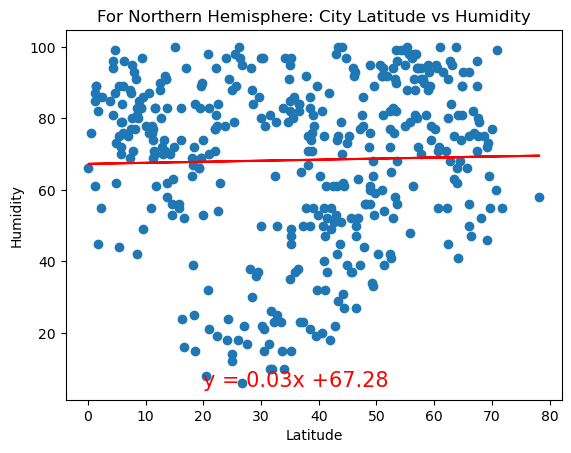

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']  #define new X and Y values
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('For Northern Hemisphere: City Latitude vs Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show plot
plt.show()

Discussion about Linear Relationship between Northern Hemisphere City Latitude and Humidity:  
There is the no obvious trend between Latitude and Humidity in the Northern Hemisphere.  The lack of a relationship is indicated by an R2 value that rounds to 0%.  Therefore, the linear regression lacks predictive power.

The r-value is: 0.01954284034047406


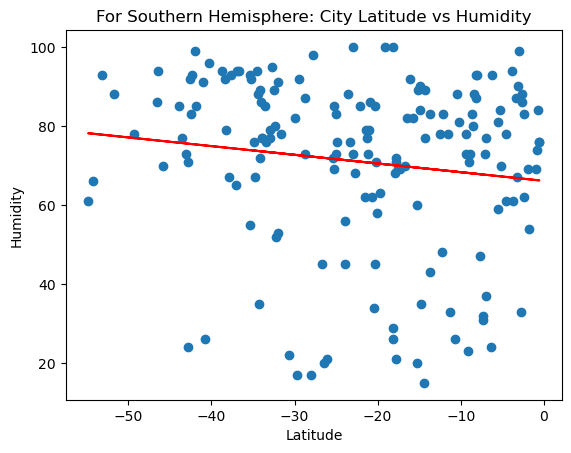

In [32]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']  #define new X and Y values
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('For Southern Hemisphere: City Latitude vs Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion about Linear Relationship between Southern Hemisphere City Latitude and Humidity:  
There is the no obvious trend between Latitude and Humidity in the Southern Hemisphere.  The lack of a relationship is indicated by an R2 of 2%.  Therefore, the linear regression lacks predictive power.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0029239929571144452


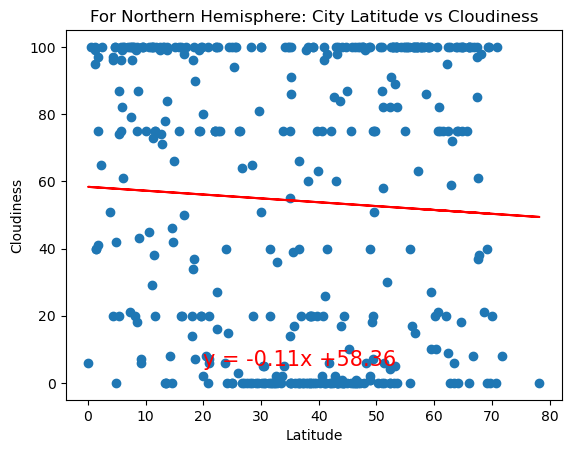

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']  #define new X and Y values
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('For Northern Hemisphere: City Latitude vs Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig9.png")

# Show plot
plt.show()

Discussion about Linear Relationship between Northern Hemisphere City Latitude and Cloudiness:  
There is the no obvious trend between Latitude and Cloudiness in the Northern Hemisphere.  The lack of a relationship is indicated by an R2 value that rounds to 0%.  Therefore, the linear regression lacks predictive power.

The r-value is: 0.029958456653073486


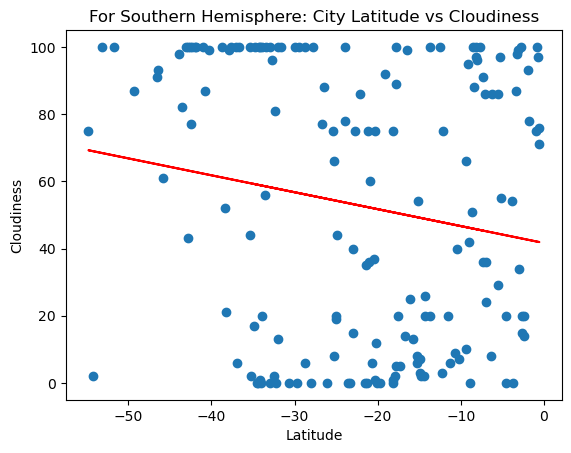

In [34]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']  #define new X and Y values
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('For Southern Hemisphere: City Latitude vs Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion about Linear Relationship between Southern Hemisphere City Latitude and Cloudiness:  
There is the no obvious trend between Latitude and Cloudiness in the Southern Hemisphere.  The lack of a relationship is indicated by an R2 value of only 3%.  Therefore, the linear regression lacks predictive power.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012660871065735298


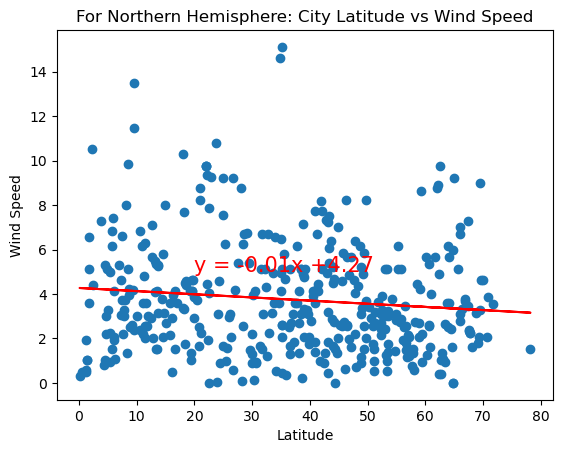

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']  #define new X and Y values
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('For Northern Hemisphere: City Latitude vs Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show plot
plt.show()

Discussion about Linear Relationship between Northern Hemisphere City Latitude and Wind Speed:  
There is the no obvious trend between Latitude and Wind Speed in the Northern Hemisphere.  The lack of a relationship is indicated by an R2 value of 1%.  Therefore, the linear regression lacks predictive power.  One may encounter high wind speeds at any latitude.

The r-value is: 0.03982877064158887


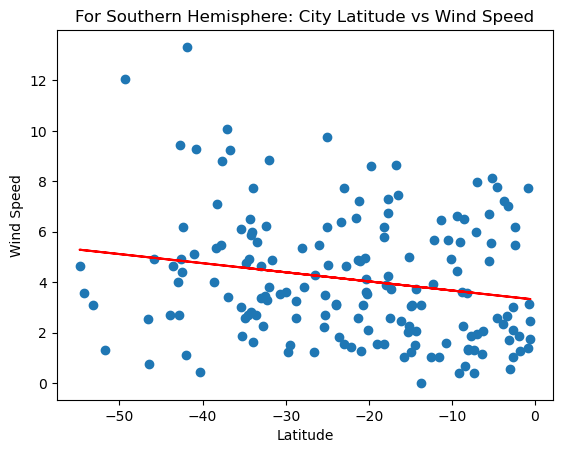

In [36]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']  #define new X and Y values
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('For Southern Hemisphere: City Latitude vs Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [24]:
#Discussion about Linear Relationship between Southern Hemisphere City Latitude and Wind Speed:  
#There is the no obvious trend between Latitude and Wind Speed in the Southern Hemisphere.  
#The lack of a relationship is indicated by an R2 value that rounds to 4%.  Therefore, the linear regression lacks predictive power.